In [ ]:
# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
# algorithms that are not affected by missing values.

Missing values in a dataset refer to the absence of a particular value 
in a variable for an observation. Missing values can occur for several 
reasons, including data entry errors, equipment failures, or simply
because the value is not available. Handling missing values is essential
because they can lead to biased or inefficient models, and can also
result in the loss of important information.

Some algorithms that are not affected by missing values include 
tree-based models such as decision trees and random forests, as 
well as boosting algorithms such as gradient boosting and XGBoost.
These algorithms can work with missing values by splitting the data
into different branches based on the available values of the features. 
Additionally, many clustering algorithms, such as k-means, can also
handle missing values by treating them as a separate category.






In [1]:
# Q2: List down techniques used to handle missing data. Give an example of each with python code.

There are several techniques used to handle missing data, some of which 
are:

Deleting rows or columns with missing values
Imputing missing values
Using algorithms that can handle missing data
Using advanced methods like data interpolation or machine learning-based methods.
Here are examples of each technique with Python code:

1. Deleting rows or columns with missing values:
    
import pandas as pd

# create a sample dataset with missing values
data = {'A': [1, 2, 3, None, 5],
        'B': [6, None, 8, 9, 10]}
df = pd.DataFrame(data)

# drop rows with missing values
df.dropna(inplace=True)
print(df)

# 2.Imputing missing values:
    
import pandas as pd
from sklearn.impute import SimpleImputer

# create a sample dataset with missing values
data = {'A': [1, 2, 3, None, 5],
        'B': [6, None, 8, 9, 10]}
df = pd.DataFrame(data)

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# fit and transform the data
df[['A', 'B']] = imputer.fit_transform(df[['A', 'B']])
print(df)


3. Using algorithms that can handle missing data:
Some algorithms like Random Forest and XGBoost can handle missing 
data, and we don't need to impute them before using them in the model.

4.Using advanced methods like data interpolation or machine 
learning-based methods:
One of the most popular methods is K-nearest neighbors (KNN) imputation,
which is a machine learning-based method. It works by finding the K
nearest neighbors of a sample with missing data and then imputing the 
missing value with the average value of its neighbors.

import pandas as pd
from sklearn.impute import KNNImputer

# create a sample dataset with missing values
data = {'A': [1, 2, 3, None, 5],
        'B': [6, None, 8, 9, 10]}
df = pd.DataFrame(data)

# create an imputer object
imputer = KNNImputer(n_neighbors=2)

# fit and transform the data
df[['A', 'B']] = imputer.fit_transform(df[['A', 'B']])
print(df)

     A     B
0  1.0   6.0
2  3.0   8.0
4  5.0  10.0
      A      B
0  1.00   6.00
1  2.00   8.25
2  3.00   8.00
3  2.75   9.00
4  5.00  10.00
     A     B
0  1.0   6.0
1  2.0   7.0
2  3.0   8.0
3  4.0   9.0
4  5.0  10.0


In [ ]:
# Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Imbalanced data refers to a situation where the classes in the
target variable of a dataset are not represented equally. In other
words, one class may have significantly more instances than the other
class(es). This is a common problem in many real-world applications,
such as fraud detection, disease diagnosis, and anomaly detection.

If imbalanced data is not handled, it can lead to biased model
predictions. This is because the model will be trained on a dataset 
that does not accurately represent the true distribution of the classes.
As a result, the model may perform poorly on the minority class and 
may have a high false negative rate. In other words, the model may 
miss important instances of the minority class, leading to potentially
serious consequences in certain applications.

There are several techniques that can be used to handle imbalanced 
data, such as:

Resampling: This involves either oversampling the minority class or
undersampling the majority class to balance the dataset.

Synthetic data generation: This involves generating synthetic 
instances of the minority class to balance the dataset.

Ensemble methods: This involves combining multiple models to improve
the classification performance on the minority class.

It is important to choose an appropriate technique based on the
specific problem and dataset at hand.






In [2]:
# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-
# sampling are required.

Upsampling and downsampling are techniques used to address 
imbalanced data in machine learning.

Upsampling is a technique where we increase the number of samples
in the minority class to balance it with the majority class. For 
example, suppose we have a dataset with two classes - Class A has 
100 samples, and Class B has only 20 samples. In this case, we can 
create synthetic samples for Class B to make the dataset balanced.
One of the commonly used upsampling techniques is the SMOTE algorithm.

Downsampling, on the other hand, involves reducing the number of
samples in the majority class to balance it with the minority class. 
For example, suppose we have a dataset with two classes - 
Class A has 1000 samples, and Class B has only 100 samples. 
In this case, we can randomly select a subset of samples from Class A 
to make the dataset balanced.

We use upsampling and downsampling when we have an imbalanced dataset.
In an imbalanced dataset, the model is biased towards the majority 
class, leading to poor performance on the minority class. By upsampling
or downsampling, we can balance the dataset, and the model can learn
the patterns from both classes.

Here's an example of how to upsample a dataset using the Python 
library scikit-learn:


from sklearn.utils import resample
import pandas as pd

# Create a sample imbalanced dataset
df = pd.DataFrame({
    'Class': ['A'] * 100 + ['B'] * 20,
    'Feature_1': range(120),
    'Feature_2': range(120, 0, -1)
})

# Upsample the minority class
df_minority = df[df['Class'] == 'B']
df_upsampled = resample(df_minority, replace=True, n_samples=100, random_state=42)

# Combine the upsampled minority class with the majority class
df_balanced = pd.concat([df[df['Class'] == 'A'], df_upsampled])

print(df_balanced['Class'].value_counts())



In this example, we first created an imbalanced dataset with Class 
A having 100 samples and Class B having only 20 samples. We then used
the resample function from the sklearn.utils module to upsample the 
minority class (Class B) by generating synthetic samples. We set the 
replace parameter to True to allow sampling with replacement and 
generated 100 samples (same as Class A). Finally, we combined the
upsampled minority class with the majority class (Class A) to get a
balanced dataset with 100 samples for each class.

Similarly, here's an example of how to downsample a dataset:


from sklearn.utils import resample
import pandas as pd

# Create a sample imbalanced dataset
df = pd.DataFrame({
    'Class': ['A'] * 1000 + ['B'] * 100,
    'Feature_1': range(1100),
    'Feature_2': range(1100, 0, -1)
})

# Downsample the majority class
df_majority = df[df['Class'] == 'A']
df_downsampled = resample(df_majority, replace=False, n_samples=100, random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_downsampled, df[df['Class'] == 'B']])

print(df_balanced['Class'].value_counts())







A    100
B    100
Name: Class, dtype: int64
A    100
B    100
Name: Class, dtype: int64


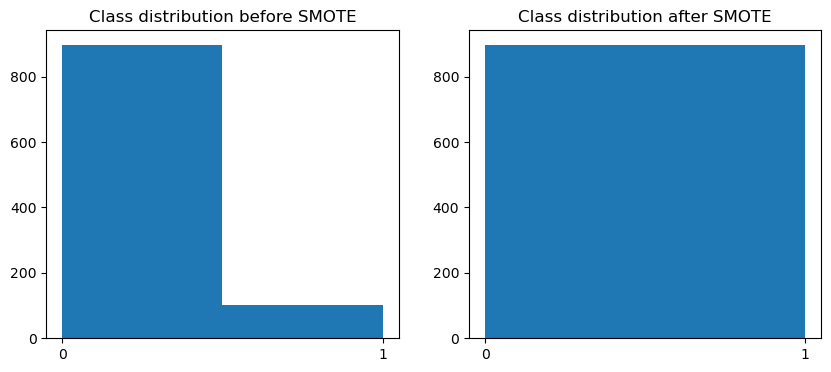

In [8]:
# Q5: What is data Augmentation? Explain SMOTE.

Data augmentation is a technique used in machine learning to 
increase the size of the training dataset by generating additional
examples that are similar to the original data. It can help to
prevent overfitting and improve model accuracy.

SMOTE, which stands for Synthetic Minority Over-sampling Technique,
is a popular data augmentation technique used in the context of
imbalanced datasets. It works by generating new examples of the
minority class by interpolating between existing examples. 
Specifically, for each minority class example, SMOTE identifies 
its k nearest neighbors and creates new synthetic examples along 
the line segments connecting the minority class example to its k 
nearest neighbors.

# Here's an example in Python:
# !pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# generate imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=0, n_clusters_per_class=2, weights=[0.9], random_state=42)

# apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# compare class distribution before and after SMOTE
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.hist(y, bins=2)
ax1.set_xticks(np.unique(y))
ax1.set_title('Class distribution before SMOTE')

ax2.hist(y_resampled, bins=2)
ax2.set_xticks(np.unique(y_resampled))
ax2.set_title('Class distribution after SMOTE')

plt.show()

In this example, we first generate an imbalanced binary classification
dataset using the make_classification function from the sklearn.datasets
module. We set the weights parameter to [0.9], which means that 90% of
the examples will belong to the majority class and only 10% will belong
to the minority class.

We then apply SMOTE using the SMOTE function from the 
imblearn.over_sampling module. This generates synthetic examples
for the minority class so that it becomes balanced with the majority
class.

Finally, we plot the class distribution before and after SMOTE
using a histogram. We can see that after applying SMOTE, the class
distribution is now balanced.






In [ ]:
# Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Outliers are data points that deviate significantly from the other data points in a dataset. They can be caused by
measurement errors, data entry errors, or genuine rare events. It is 
essential to handle outliers because they can negatively impact the 
analysis and modeling of the dataset. Outliers can distort the overall
picture of the data and can also have a significant impact on the mean
and standard deviation of the dataset, leading to incorrect conclusions
and predictions.

For example, in a dataset of students' test scores, an outlier could
be a student who scores significantly higher or lower than the rest 
of the students in the class. If this outlier is not handled, it can 
skew the average test score, making it seem like the class performed 
better or worse than they actually did.

Handling outliers involves detecting and removing or correcting the
data points that deviate significantly from the rest of the data. 
There are several methods for detecting outliers, including 
visualization techniques and statistical methods such as the Z-score 
and IQR methods. Once the outliers are identified, they can be removed
or corrected through methods such as trimming, winsorization, or 
replacing with a more reasonable value.

Overall, handling outliers is essential to ensure the accuracy and
reliability of the analysis and modeling of a dataset.

In [9]:
# Q7: You are working on a project that requires analyzing customer data. However, you notice that some of
# the data is missing. What are some techniques you can use to handle the missing data in your analysis?

There are several techniques that can be used to handle missing data in
a dataset. Some of the commonly used techniques are:

Deletion: In this technique, the rows or columns with missing data are
deleted from the dataset. There are three ways to perform deletion: 
    list-wise deletion, pair-wise deletion, and column deletion. 
    However, deletion can lead to loss of valuable information.

Imputation: In this technique, missing values are replaced with 
estimated values based on the available data. Some of the popular
imputation techniques are mean imputation, median imputation, mode
imputation, and KNN imputation.

Interpolation: This technique involves estimating the missing values
by interpolating the values from other data points in the dataset.
Linear interpolation, cubic spline interpolation, and polynomial 
interpolation are some of the popular interpolation techniques.

Machine Learning: Machine learning algorithms can also be used to
predict the missing values. For instance, K-nearest neighbors (KNN) 
and Random Forest can be used to predict the missing values.

Here is an example of how to use mean imputation to handle missing 
data in Python

import pandas as pd
import numpy as np

# create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, np.nan]})

# replace missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
print(df)

          A         B     C
0  1.000000  5.000000   9.0
1  2.000000  6.666667  10.0
2  2.333333  7.000000  11.0
3  4.000000  8.000000  10.0


In [ ]:
# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are
# some strategies you can use to determine if the missing data is missing at random or if there is a pattern
# to the missing data?

There are various methods to determine if the missing data is missing 
at random or if there is a pattern to the missing data. Here are some
strategies you can use:

Visualize the data: Plotting the data can help identify if there is any
pattern to the missing values. For instance, you can create a heatmap
or correlation matrix to visualize the missing values.

Statistical tests: You can use statistical tests like Little's MCAR
(Missing Completely at Random) test, Missing at Random (MAR), or 
Missing Not at Random (MNAR) to determine the missingness pattern.

Imputation methods: Another way to understand the missingness pattern
is to use imputation methods to fill in the missing values. Imputing
the missing values and comparing the imputed data to the original data
can help identify patterns in the missing data.

Use machine learning models: Machine learning models can be trained on
data with missing values. The model's performance can help identify 
if the missing values have any pattern or not.

Once you determine the missingness pattern, you can use appropriate imputation techniques to fill in the missing values or develop a strategy to handle the missing data.

In [ ]:
# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the
# dataset do not have the condition of interest, while a small percentage do. What are some strategies you
# can use to evaluate the performance of your machine learning model on this imbalanced dataset?

When working with imbalanced datasets, the traditional evaluation 
metrics like accuracy may not provide an accurate reflection of the
model's performance. Here are some strategies that can be used to 
evaluate the performance of the machine learning model:

Confusion matrix: A confusion matrix is a table that summarizes the
performance of the classification model. It shows the true positive,
true negative, false positive, and false negative rates. 
The metrics derived from a confusion matrix like precision, recall, 
and F1-score are more informative than accuracy.

Precision-Recall curve: The precision-recall curve (PRC) is a 
graph that shows the trade-off between precision and recall at
different classification thresholds. It is a better measure of 
performance for imbalanced datasets because it focuses on the 
positive class and does not penalize the model for correctly 
predicting the negative class.

ROC Curve: The ROC (Receiver Operating Characteristic) curve is
another graph that shows the trade-off between the true positive
rate (sensitivity) and the false positive rate (1-specificity) at
different classification thresholds.

Resampling techniques: Resampling techniques like oversampling 
(e.g. SMOTE) and undersampling (e.g. Random Under Sampling) can 
be used to balance the dataset. Resampling can be used with or
without replacement to generate balanced datasets. However, 
oversampling may lead to overfitting, and undersampling may 
discard useful information from the dataset.

Class weight: The class_weight parameter in some machine learning
algorithms (e.g. logistic regression, random forests, etc.) can be
used to give higher weights to the minority class samples during 
training. This can help the model learn more effectively from the 
minority class samples.

Ensemble techniques: Ensemble techniques like bagging, boosting,
and stacking can be used to improve the performance of the model.
These techniques can be used to combine the predictions of multiple 
models to reduce the effects of class imbalance.

It's important to note that each strategy has its advantages and
disadvantages, and it is crucial to evaluate the performance of the
model on multiple metrics to get a better understanding of the model's
strengths and weaknesses.






In [13]:
# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is
# unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to
# balance the dataset and down-sample the majority class?

To balance the dataset and down-sample the majority class, 
the following methods can be employed:

Random under-sampling: In this technique, a random sample of the
majority class is removed to balance the dataset. This technique is
useful when the dataset is large, and the majority class has a 
significant number of instances. Here's an example code snippet in
Python using the imbalanced-learn library:
    
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

Cluster centroids: This technique under-samples the majority class
by replacing a cluster of majority class instances with the centroid
of the cluster. This technique is useful when the dataset is large and
the majority class has overlapping instances. Here's an example code
snippet in Python using the imbalanced-learn library:

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X, y)

Tomek links: This technique identifies and removes the majority class 
instances that are close to minority class instances. This technique 
is useful when the majority and minority classes overlap. Here's an
example code snippet in Python using the imbalanced-learn library:

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

NearMiss: This technique under-samples the majority class by selecting
instances that are closest to the minority class instances. This 
technique is useful when the majority and minority classes are well 
separated. Here's an example code snippet in Python using the
imbalanced-learn libray

from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
X_res, y_res = nm.fit_resample(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a
# project that requires you to estimate the occurrence of a rare event. What methods can you employ to
# balance the dataset and up-sample the minority class?

When dealing with a dataset with a low percentage of occurrences
or a rare event, we need to up-sample the minority class to balance 
the dataset. Here are some methods that can be used for up-sampling 
the minority class:

Random oversampling: Randomly duplicate examples from the minority 
class to increase its size. This method is simple but may lead to
overfitting.

SMOTE (Synthetic Minority Over-sampling Technique): It is a popular
method used for up-sampling the minority class. It creates synthetic
examples of the minority class by interpolating between pairs of 
minority class examples that are close to each other.

ADASYN (Adaptive Synthetic Sampling): This method is similar to SMOTE
, but it uses a density distribution of the minority class examples
to generate synthetic examples.

Here's an example of how to use the SMOTE technique for up-sampling
the minority class in Python using the imblearn library:

from imblearn.over_sampling import SMOTE

# X and y are the feature matrix and target variable
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)